In [ ]:
# data.zip 파일 업로드

In [ ]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import os

In [ ]:
# 1. Custom data set 만들기 (참고 https://saneblog.tistory.com/9)
# 1-1. wav 파일을 spectrogram image로 만들어 저장
# 1-2. train set 과 test set을 분류
# 1-3. Labeling

In [ ]:
# wav파일 받아오기
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
# zip file(.wav files) 압축 해제
import zipfile

fantasy_zip = zipfile.ZipFile('/content/data.zip')
fantasy_zip.extractall('/content/')
 
fantasy_zip.close()

In [ ]:
# spectrograms 변환 함수 만들기
# 참고: https://librosa.org/doc/main/generated/librosa.feature.melspectrogram.html
# spectrograms 는 2차원의 numpy array로 저장된다. 축 하나는 frequency, 다른 축 하나는 time이다.
# sr = sampling rate(Hz) : 1초에 얼마만큼의 sample을 sampling 할지
# frame = short audio clip (<=> spectrogram column) : 
#         긴 wav파일을 frame을 나눠서 분석하고 다룰 때 필요한 작은 단위
# n_fft = samples per frame : 한 프레임 안에 있는 샘플 수
# hop_length = #samples between frames : 프레임을 이동시킬 때 몇개의 샘플 수 기준으로 옮겨갈지
# default setting
#   sr: 22050
#   n_fft: 2048
#   hop_length: 512 (대부분 n_fft의 1/4 사이즈로 이동)
# librosa 에서 stft는 간단하게 계산된다
def make_iamge(SOURCE, TARGET):

    #%matplotlib inline

    #audio_path = 'C:/workspace/sogang04/tensorflow/midterm/drum_wavset/acoustic/acoust_SD/RealDrum01_00#SD#train.wav'
    file = SOURCE
    y, sr = librosa.load(file)
    # y: np.ndarray; audio time series;
    # sr: number; sampling rate of y ; 샘플링 주파수; 초)당 샘플링 횟수; Hz; default sr=22050

    # print(type(y), type(sr))
    # print(y.shape, sr)
    print(TARGET)

    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

    S_dB = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    librosa.display.specshow(S_dB, sr=sr)
    plt.savefig(TARGET, bbox_inches='tight', pad_inches=0)    

In [ ]:
# wav파일별로 Spectrogram 변환 실행위한 경로 변수 설정
in_path = '/content/data/in/'
out_path = '/content/data/out/'
label_path = ['a_h','a_k','a_s','e_h','e_k','e_s']
len(label_path)

6

In [ ]:
# 폴더삭제
import shutil
shutil.rmtree(r'/content/data/out')

In [ ]:
# # 폴더생성
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
outfolder = '/content/data/out'
createFolder(outfolder)
for i in label_path:
  createFolder(outfolder+'/'+i)

In [ ]:
# wav파일별로 Spectrogram 변환 실행
for i in label_path:
        # print(wav_home_path+i)
        file_list = os.listdir(in_path+i)
        #print(len(file_list))
        #print(file_list)
        for j in file_list:
            SOURCE = in_path+i+"/"+j
            TARGET = out_path+i+"/"+j[:-3]+"jpg"
            #TARGET = "C:/data/out/"+j[:-3]+"jpg"
            #print(SOURCE)
            #print(TARGET)
            # ----------------------------------------
            # 아랫줄 make_iamge() 실행하면 이미지 생성 됨
            make_iamge(SOURCE, TARGET)
            # ----------------------------------------

In [ ]:
# 이미지 로드 및 전처리
# 참고: https://www.tensorflow.org/tutorials/load_data/images?hl=ko
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
print(tf.__version__)

2.6.0


In [ ]:
# %%
# 데이터세트 형식으로 만들기
import pathlib

data_dir = pathlib.Path('/content/data/out')
print(type(data_dir))
print(data_dir)

<class 'pathlib.PosixPath'>
/content/data/out


In [ ]:
# %%
# image count
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)
# 236

216


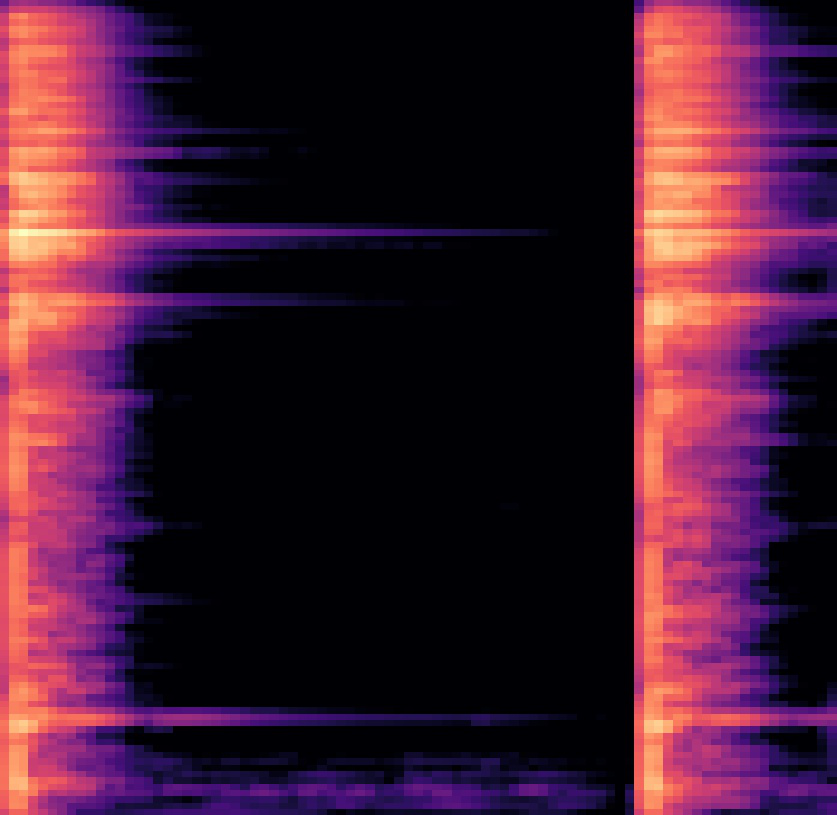

In [ ]:
# %%
# image 1개 보기
a_h = list(data_dir.glob('a_h/*'))
PIL.Image.open(str(a_h[0]))

In [ ]:
# %%
# 데이터세트 만들기
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# %%
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(img_height, img_width),
    # color_mode='grayscale', #Default: "rgb"
    batch_size=batch_size,
)
# Found 236 files belonging to 6 classes.
# Using 189 files for training

Found 216 files belonging to 6 classes.
Using 173 files for training.


In [ ]:
# %%
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(img_height, img_width),
    # color_mode='grayscale', #Default: "rgb"
    batch_size=batch_size,
)
# Found 236 files belonging to 6 classes.
# Using 47 files for validation.

Found 216 files belonging to 6 classes.
Using 43 files for validation.


In [ ]:
# %%
# class_names 속성에서 클래스 이름을 찾기
class_names = train_ds.class_names
print(class_names)
# ['a_h', 'a_k', 'a_s', 'e_h', 'e_k', 'e_s']

['a_h', 'a_k', 'a_s', 'e_h', 'e_k', 'e_s']


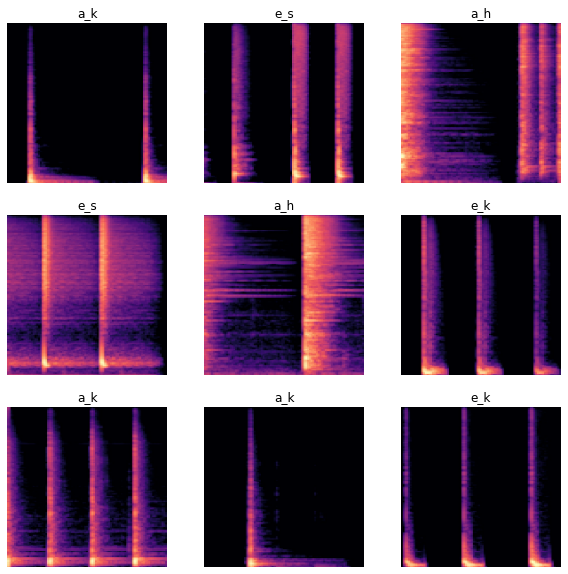

In [ ]:
# %%
# 데이터 시각화하기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# %%
# 데이터세트를 수동으로 반복하고 이미지 배치를 검색
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
# (32, 180, 180, 3)
# (32,)

(32, 180, 180, 3)
(32,)


In [ ]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (32, 180, 180, 3)
Label:  [5 0 5 2 0 1 1 1 1 1 4 1 0 4 0 1 3 5 4 5 2 0 4 1 2 3 2 3 2 1 1 2]


In [ ]:
# %%
# 데이터 표준화하기
# [0, 1] 범위에 있도록 값을 표준화
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
# %%
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
# 0.0 1.0


0.0 1.0


In [ ]:
# %%
# 성능을 위한 데이터세트 구성하기
# AUTOTUNE = tf.data.AUTOTUNE
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (32, 180, 180, 3)
Label:  [0 1 3 1 5 0 4 3 3 1 5 5 4 2 4 3 4 1 4 0 3 1 0 0 0 0 2 4 1 2 0 2]


In [ ]:
# 모델 훈련하기
num_classes = 6

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
# 모델 훈련하기
num_classes = 6
# tf.keras.layers.Conv2D(
#     filters, kernel_size, strides=(1, 1), padding='valid',
#     data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
#     use_bias=True, kernel_initializer='glorot_uniform',
#     bias_initializer='zeros', kernel_regularizer=None,
#     bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
#     bias_constraint=None, **kwargs
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same", strides=1),#,input_shape=(180, 180, 3)),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding="same", strides=1),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(512, (3,3), activation='relu', padding="same", strides=1),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
# %%
#model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [ ]:
# %%
# 3번 epoch 훈련
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
6/6 [==============================] - 4s 448ms/step - loss: 4.5611 - accuracy: 0.2023 - val_loss: 1.7732 - val_accuracy: 0.3488
Epoch 2/20
6/6 [==============================] - 2s 380ms/step - loss: 1.6840 - accuracy: 0.3757 - val_loss: 1.6041 - val_accuracy: 0.4651
Epoch 3/20
6/6 [==============================] - 2s 379ms/step - loss: 1.2833 - accuracy: 0.5029 - val_loss: 1.0820 - val_accuracy: 0.5349
Epoch 4/20
6/6 [==============================] - 2s 380ms/step - loss: 0.9528 - accuracy: 0.6012 - val_loss: 1.0382 - val_accuracy: 0.5581
Epoch 5/20
6/6 [==============================] - 2s 378ms/step - loss: 0.8259 - accuracy: 0.6532 - val_loss: 0.9756 - val_accuracy: 0.6512
Epoch 6/20
6/6 [==============================] - 2s 378ms/step - loss: 0.5575 - accuracy: 0.8035 - val_loss: 0.8787 - val_accuracy: 0.6744
Epoch 7/20
6/6 [==============================] - 2s 380ms/step - loss: 0.3927 - accuracy: 0.8728 - val_loss: 0.9983 - val_accuracy: 0.6512
Epoch 8/20
6/6 [====

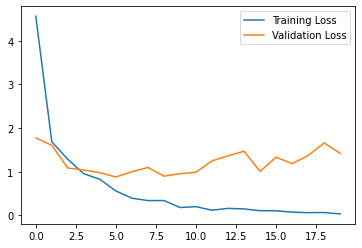

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
# 미세 제어를 위해 tf.data 사용하기
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [ ]:
for f in list_ds.take(5):
  print(f.numpy())

b'/content/data/out/e_k/e_k_005.jpg'
b'/content/data/out/a_h/a_h_001.jpg'
b'/content/data/out/e_h/e_h_006.jpg'
b'/content/data/out/a_h/a_h_030.jpg'
b'/content/data/out/e_s/e_s_023.jpg'


In [ ]:
# 파일의 트리 구조를 사용하여 class_names 목록을 컴파일
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['a_h' 'a_k' 'a_s' 'e_h' 'e_k' 'e_s']


In [ ]:
# 데이터세트를 훈련 및 검증으로 분할합니다.
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [ ]:
# 각 데이터세트의 길이 확인
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

189
47


In [ ]:
# 파일 경로를 (img, label) 쌍으로 변환하는 간단한 함수
def get_label(file_path):
  # convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [ ]:
def decode_img(img):
  # convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [ ]:
def process_path(file_path):
  label = get_label(file_path)
  # load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [ ]:
# Dataset.map을 사용하여 image, label 쌍의 데이터세트를 작성
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [ ]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  5


In [ ]:
# 성능을 위한 데이터세트 구성하기
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

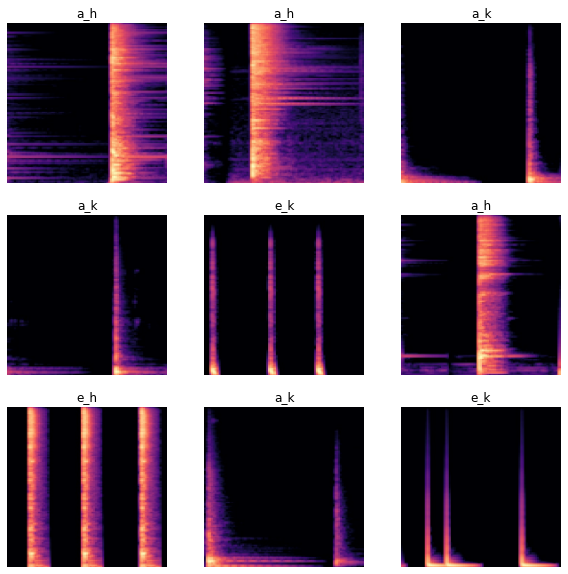

In [ ]:
# 데이터 시각화하기
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [ ]:
#모델 계속 훈련하기
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
6/6 [==============================] - 6s 1s/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 1.0690 - val_accuracy: 0.7660
Epoch 2/10
6/6 [==============================] - 6s 1s/step - loss: 0.0159 - accuracy: 0.9947 - val_loss: 1.1060 - val_accuracy: 0.7660
Epoch 3/10
6/6 [==============================] - 6s 1s/step - loss: 0.0148 - accuracy: 0.9947 - val_loss: 1.0484 - val_accuracy: 0.7660
Epoch 4/10
6/6 [==============================] - 6s 1s/step - loss: 0.0134 - accuracy: 0.9947 - val_loss: 1.1190 - val_accuracy: 0.7234
Epoch 5/10
6/6 [==============================] - 6s 1s/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.1960 - val_accuracy: 0.7234
Epoch 6/10
6/6 [==============================] - 6s 1s/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.2118 - val_accuracy: 0.7660
Epoch 7/10
6/6 [==============================] - 6s 1s/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.2619 - val_accuracy: 0.7447
Epoch 8/10
6/6 [=========================

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_9 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 41, 41, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 20, 20, 32)       

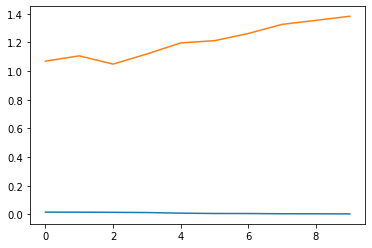

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")